# Accuracy:
Accuracy tells you:
   Out of all predictions, how many did the model get right?

## Formula
  Accuracy=Correct Predictions/Total Predictions
  =TP+TN/TP+TN+FP+FN

​


**TP (True Positive):**  Correctly predicted positive cases

**TN (True Negative):** Correctly predicted negative cases

**FP (False Positive):** Wrongly predicted positive (was negative)

**FN (False Negative):**  Wrongly predicted negative (was positive)



## Example
Suppose you have 100 emails:

- 90 are not spam

- 10 are spam

- Suppose Model predicts:

- 90 emails correctly as not spam (TN)

- 5 spam emails correctly (TP)

- 5 spam emails are missed (predicted as not spam) (FN)

- 0 normal emails wrongly marked as spam (FP)

So:
   - Correct = TP + TN = 5 + 90 = 95
   - Total = 100
   - Accuracy = 95 / 100 = 95%

## Where Accuracy is Misleading
- Model  missed 5 spam emails
- But  still got 95% accuracy — looks good, right?
The problem is:

             - The data is imbalanced (90% not spam, only 10% spam)

- The model could have done nothing and marked all emails as not spam, and it would still get 90% accuracy!

- So accuracy does not tell  how well the model catches the rare spam that’s why we also need Precision, Recall, and F1-Score to really see how good the model is for the minority class. Basically it does not tell whether how much the type 1 and type 2 error . that is over come using confusion metric for knowing that.



### Key Point
- Good: When you have balanced data (e.g., 50% spam, 50% not spam).

- Bad: When one class is much bigger than the other.

 ### Rule:
 - High accuracy ≠ good model when classes are imbalanced.

### Q. how much the accuracy should be?
- it depend on the nature of data.

In [13]:
from sklearn.metrics import accuracy_score,confusion_matrix
import pandas as pd

In [7]:

# --- Example: 1000 transactions ---
# 999 normal (label = 0), 1 fraud (label = 1)
data = {
    'Transaction_ID': list(range(1, 1001)),
    'Actual': [0] * 999 + [1],        # 0 = normal, 1 = fraud
    'Predicted': [0] * 1000           # Model predicts all normal
}

df = pd.DataFrame(data)


In [4]:
# --- Accuracy ---
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.999


In [8]:
print(df.tail())

     Transaction_ID  Actual  Predicted
995             996       0          0
996             997       0          0
997             998       0          0
998             999       0          0
999            1000       1          0


In [9]:
accuracy = accuracy_score(df['Actual'], df['Predicted'])

In [11]:
print("\n Accuracy:", accuracy)


 Accuracy: 0.999


In [14]:
cm = confusion_matrix(df['Actual'], df['Predicted'])

In [16]:
cm

array([[999,   0],
       [  1,   0]])

In [18]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1️ Example data ---
# 999 normal, 1 fraud
y_true = [0] * 999 + [1]
y_pred = [0] * 1000  # Model predicts all normal




# Confusion Matrix
Definition: Table showing counts of TP, FP, TN, F

|                     | Predicted Positive | Predicted Negative |
| ------------------- | ------------------ | ------------------ |
| **Actual Positive** | TP                 | FN                 |
| **Actual Negative** | FP                 | TN                 |
 Basis for all other metrics.

Confusion Matrix:
 [[999   0]
 [  1   0]]


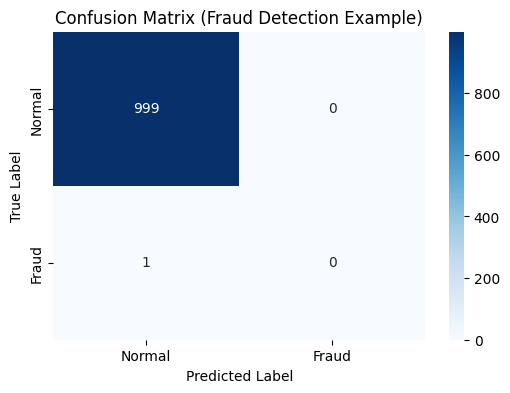

In [19]:
# --- 2️ Confusion Matrix ---
cm = confusion_matrix(y_true, y_pred)

print("Confusion Matrix:\n", cm)

# --- 3️ Plot with Seaborn ---
labels = ['Normal', 'Fraud']

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Fraud Detection Example)')
plt.show()